In [1]:
from concurrent.futures import ThreadPoolExecutor

%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

import segregation

In [5]:
os.chdir('C:/Users/renan/Desktop/full_count_2010')
census_2010 = pd.read_csv('std_2010_fullcount.csv', encoding = "ISO-8859-1", sep = ",")

with open('tracts_US.pkl', 'rb') as input:
    map_gpd = pickle.load(input)
    
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])

In [6]:
census_2000 = pd.read_csv("C:/Users/renan/Desktop/full_count_2010/LTDB_Std_2000_fullcount.csv", encoding = "ISO-8859-1", sep = ",")

census_2000 = census_2000.loc[(census_2000.county == "Los Angeles County")]

# Some population data for 2000 came as decimals
census_2000['pop00']   = round(census_2000['POP00']).astype(int)
census_2000['nhblk00'] = round(census_2000['NHBLK00']).astype(int)
census_2000['trtid10'] = census_2000['TRTID10']
gdf_2000 = map_gpd.merge(census_2000, left_on = 'INTGEOID10', right_on = 'trtid10')[['geometry', 'nhblk00', 'pop00']]

df = census_2010.loc[(census_2010.county.isin(["New York County", "Bronx County", "Kings County", "Queens County", "Richmond County"])) & (census_2010.state == 'NY')] # & (census_2010.state == 'WI')
df

,trtid10,state,county,tract,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
55589,36005000100,NY,Bronx County,Census Tract 1,11091,782,6208,26,39,3779,...,0,60,39,0,1,25,0,0,bh,Minority
55590,36005000200,NY,Bronx County,Census Tract 2,4334,130,1012,12,137,2993,...,730,476,133,32,18,12,5,0,bha,Minority
55591,36005000400,NY,Bronx County,Census Tract 4,5503,189,1365,14,126,3755,...,932,476,116,26,16,11,3,2,bh,Minority
55592,36005001600,NY,Bronx County,Census Tract 16,5643,195,1854,24,58,3482,...,807,700,50,3,6,16,5,4,bh,Minority
55593,36005001900,NY,Bronx County,Census Tract 19,1917,187,502,10,27,1186,...,302,89,22,1,0,10,2,0,bh,Minority
55595,36005002000,NY,Bronx County,Census Tract 20,8731,112,3101,45,93,5361,...,1449,745,90,16,8,44,20,2,bh,Minority
55597,36005002300,NY,Bronx County,Census Tract 23,4933,41,1628,9,13,3223,...,827,605,9,2,3,8,5,2,bh,Minority
55599,36005002400,NY,Bronx County,Census Tract 24,4,0,0,0,0,4,...,0,0,0,0,0,0,0,0,h,Minority
55601,36005002500,NY,Bronx County,Census Tract 25,5491,78,1001,11,40,4349,...,1142,559,26,5,1,10,2,2,bh,Minority
55603,36005002701,NY,Bronx County,Census Tract 27.01,3113,28,1009,15,6,2050,...,562,271,5,4,0,15,8,1,bh,Minority


In [7]:
ny_gdf_pre = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')

In [8]:
ny_gdf_pre.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,COUNTY_ID,county_id2,COUNTYNS10,NAME10_COU,GEOID_MSA,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
0,36,005,015100,36005015100,151,36005,36005,974101,Bronx,35620,...,805,212,22,3,0,15,4,1,bh,Minority
1,36,005,037600,36005037600,376,36005,36005,974101,Bronx,35620,...,221,56,75,14,7,6,3,0,bha,Minority
2,36,005,024800,36005024800,248,36005,36005,974101,Bronx,35620,...,173,157,506,117,53,1,0,1,wbha,Global
3,36,005,023301,36005023301,233.01,36005,36005,974101,Bronx,35620,...,701,272,40,8,5,5,0,0,bh,Minority
4,36,005,019400,36005019400,194,36005,36005,974101,Bronx,35620,...,293,98,50,5,7,11,3,0,wbha,Global


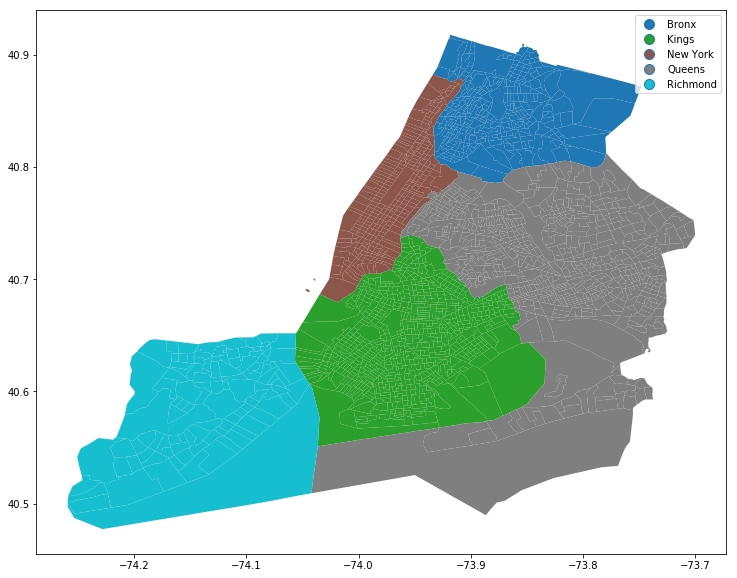

In [11]:
ax1 = ny_gdf_pre.plot(column='NAME10_COU',
                      #cmap = 'OrRd', 
                      categorical=True,
                      figsize=(20,10),
                      legend = True)